<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/06_Support_Vector_Machine(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**

Support Vector Machine is a supervised machine learning algorithm used for classification and regression tasks. This algorithm works well for classifying high-dimensional data with many features. Usually, it is used to solve binary problems, where we have to categorize data points into two classes based on their features.

The algorithm works by finding the best hyperplane that maximizes the margin between the two classes. This means that the algorithm finds a decision boundary (line in 2-dimensional or hyperplane in n-dimensional space) that generates the largest possible gap between the data points of different classes, so that the distance between the closest data point from each class is as large as possible.

We have to take into account that not always our problem is linearly separable. In such cases, this algorithm can use a **kernel function** to transform the data into a higher-dimensional space where linear separation might be possible. This is known as **"the kernel trick"**, and it allows us to handle complex and non-linear data.

There are some difficulties with the algorithm as:
* It is an expensive task according to time and consuming resources
*

**Dictionary:**

* Decision Boundary: The decision boundary is the hyperplane that separates different classes in a classification problem. It acts as a dividing line (in 2-dimensional space) or a dividing hyperplane (in higher-dimensional space) and helps classify new data points into their respective classes based on their features.

* Margin: The margin is the distance between the decision boundary and the closest support vector from each class. A larger margin indicates a more confident separation between classes. A wide margin generally means that the model is less prone to making classification errors on new, unseen data.

* Support Vectors: Support vectors are the data points from each class that are closest to the decision boundary. These points play a crucial role in defining the decision boundary and determining the model's behavior. They "support" the decision boundary by influencing its position and orientation, hence the name "support vectors."

## **Example**

We are going to train a model using random values generated as in the K-Means notebook, so consider:

In [1]:
import numpy as np

#Create a random dataset with N people in k clusters
def randomDataSet(N, k):
  '''
  N = Amount of data set
  k = Number of the partition of the data set
  If k does not divide N, the amount of data set will be less
  '''
  np.random.seed(123)
  pointsPerCluster = float(N)/k
  X = []
  y = []
  centroids = []
  #We call the amount of centroids according to the number k
  for i in range (k):
      # Random numbers to describe the centroids with 2 coordinates
      centroidX = np.random.uniform(20000.0, 200000.0)
      centroidY = np.random.uniform(20.0, 70.0)
      # Add to the list k of centroids
      centroids.append([centroidX , centroidY])
      # Consider a number of  int(pointsPerCluster) elements near to each fixed centroid
      for j in range(int(pointsPerCluster)):
          X.append([np.random.normal(centroidX , 10000.0), np.random.normal(centroidY , 2.0)])
          y.append(i)
  X = np.array(X)
  y = np.array(y)
  return X, y, centroids

Creating the dataset using the previous function:

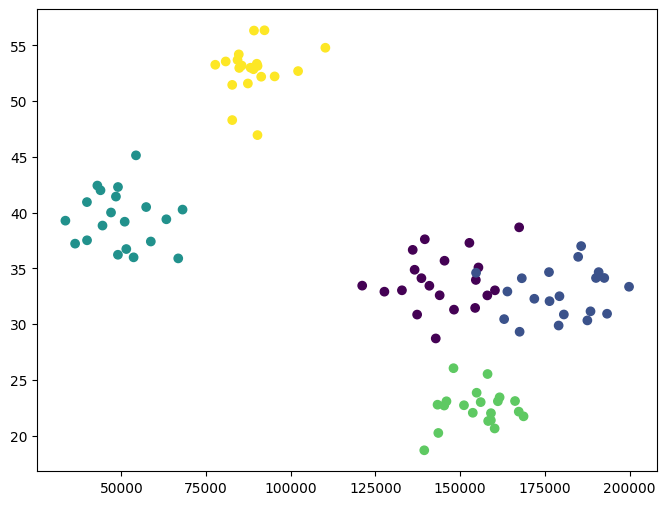

In [2]:
%matplotlib inline
from pylab import *

# Creating the dataset with 500 elements and 5 centroids
(X, y, centroids) = randomDataSet(100, 5)

# Plotting the point in a plane
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c = y.astype(np.float64))
plt.show()


It is useful to normalize the data because having different scales for several features could lead to one feature dominating over the others. Therefore, it is necessary to maintain the same scale among all the features. In this case we are going to used the tecnique min-max scaler, which in Support Vector Machines plays a relevant role due to this algorithm is sensitive to the scale of input features.

<ipython-input-3-4d0e11e73a06>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))


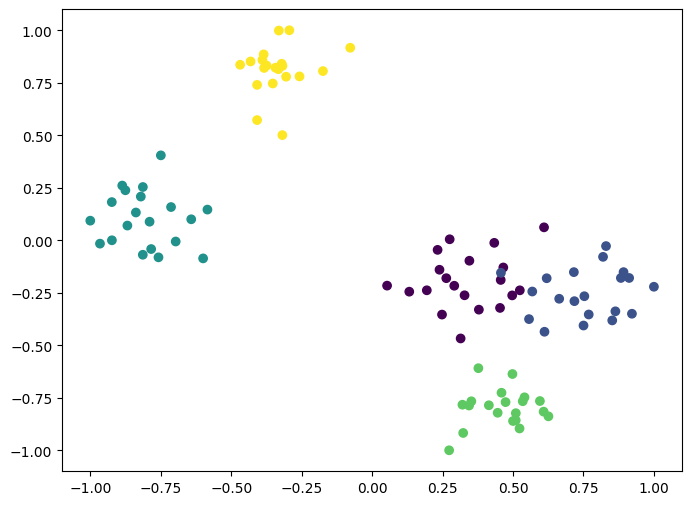

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Using min-max scaler to normalized the data
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Having the data normalized, we are going to use the svm moule in scikit learn which includes all Support Vector Machine algorithms. In this case we consider the SVC which means Support Vector Classification. To the description of the algorithm, we consider C as the regularization parameter, this help us to prevent overfitting an improves the generalization performance.

We have to keep in mind that very large C values might lead to overfitting, especially if the data is noisy or contains outliers. Conversely, very small C values might lead to underfitting, resulting in a model that doesn't capture the underlying patterns in the data.

At first approach, we cannot determine the optimal value of C. We need to try several values of C and conclude based on the best performance achieved.

In [4]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

We use the SVC model to plot the different classification regions that describe our data.

<ipython-input-5-fae7f1c97735>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points


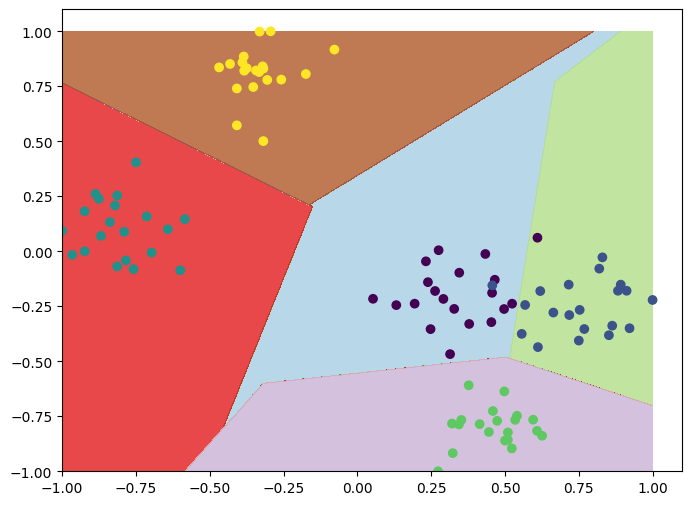

In [5]:
def plotPredictions(clf):
    # Create a dense grid of points to sample
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))

    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()

    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]

    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()

plotPredictions(svc)

After that, we are able to do predictions given an specific point, so we consider some examples to classify:

In [9]:
svc.predict(scaling.transform([[127000, 23]]))

array([3])

In [10]:
svc.predict(scaling.transform([[50000, 40]]))

array([2])

In [11]:
svc.predict(scaling.transform([[27000, 25]]))

array([2])

In [13]:
svc.predict(scaling.transform([[100000, 55]]))

array([4])

## Using other hyperparameters:

We are going to change the kernel, and want to see how every group change depend on this kernel.

<ipython-input-5-fae7f1c97735>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points


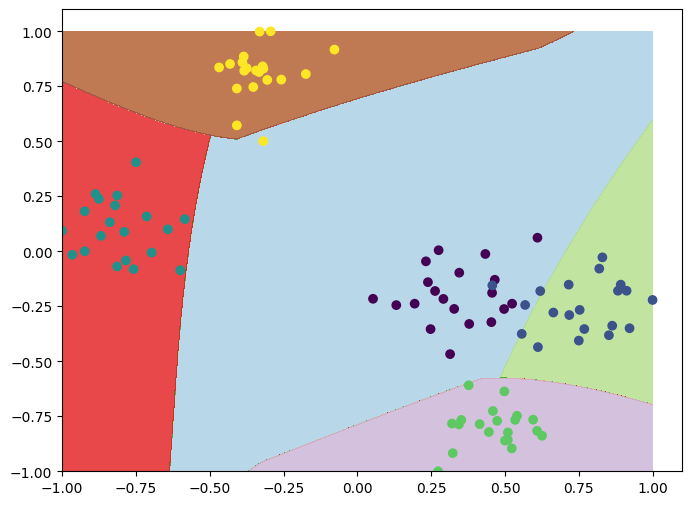

In [6]:
C = 1.0
svc_poly = svm.SVC(kernel='poly', C=C).fit(X, y)

plotPredictions(svc_poly)

<ipython-input-5-fae7f1c97735>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points


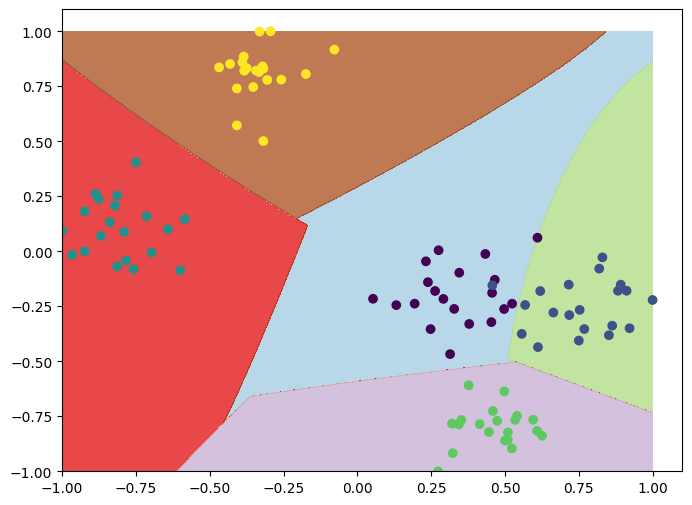

In [7]:
C = 1.0
svc_rbf = svm.SVC(kernel='rbf', C=C).fit(X, y)

plotPredictions(svc_rbf)

<ipython-input-5-fae7f1c97735>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points


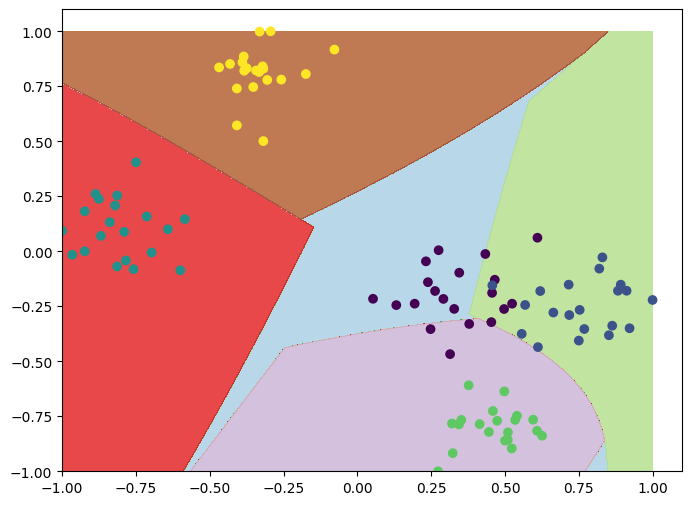

In [8]:
C = 1.0
svc_sigmoid = svm.SVC(kernel='sigmoid', C=C).fit(X, y)


plotPredictions(svc_sigmoid)